In [1]:
import sys
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from IPython.display import HTML

import thicket as th
from thicket.model_extrap import ExtrapInterface

display(HTML("<style>.container { width:80% !important; }</style>"))

# display all columns from pandas data frames
pd.options.display.max_columns = None

data = "../../data/LULESH/exclusive/weak"
thicket = th.Thicket.from_caliperreader(data)


<IPython.core.display.Javascript object>

In [2]:
#thicket.metadata

In [3]:
extrap_interface = ExtrapInterface()

In [4]:
extrap_interface.print_modelers()

Available Extra-P Modeler: ['multi-parameter', 'basic', 'refining', 'default']


In [5]:
extrap_interface.print_modeler_options("default")

Modeler Options
--------------
allow_log_terms	 BOOL	 Allows models with logarithmic terms
use_crossvalidation	 BOOL	 Enables cross-validation
compare_with_RSS	 BOOL	 If enabled the models are compared using their residual sum of squares (RSS) instead of their symmetric mean absolute percentage error (SMAPE)
poly_exponents	 STR	 Set of polynomial exponents. Use comma separated list.
log_exponents	 STR	 Set of logarithmic exponents. Use comma separated list.
retain_default_exponents	 BOOL	 If set the default exponents are added to the given ones.
force_combination_exponents	 BOOL	 If set the exact combination of exponents is forced.
allow_negative_exponents	 BOOL	 If set adds neagtive exponents for strong scaling.



In [6]:
extrap_interface = ExtrapInterface()

modeler_options = {'allow_log_terms': True,
                   'use_crossvalidation': True,
                   'compare_with_RSS': False,
                   'poly_exponents': "0,1,2,3,4,5",
                   'log_exponents': "0,1,2",
                  }

extrap_interface.create_models(thicket, 
                               parameters=[
                                   "jobsize",
                                   "problem_size"
                                ], 
                               metrics=[
                                   "Avg time/rank (exc)",
                                   ], 
                               use_median=True,
                               modeler="default",
                               model_name="config1")

extrap_interface.create_models(thicket, 
                               parameters=[
                                   "jobsize",
                                ], 
                               metrics=[
                                   "Avg time/rank (exc)",
                                   ], 
                               modeler="default",
                               model_name="config2",
                               modeler_options=modeler_options)

extrap_interface.create_models(thicket, 
                               parameters=[
                                   "problem_size"
                                ], 
                               metrics=[
                                   "Avg time/rank"
                                   ], 
                               use_median=False,
                               modeler="refining",
                               model_name="config3")




/usr/WS2/ritter5/thicket/thicket/model_extrap.py:1223: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '$5.514\times10^{−4}+6.196\times10^{−6}\cdot q^{7/4}$' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  tht.statsframe.dataframe.at[


(Callpath(CommSBN), Metric(Avg time/rank (exc)))
(Callpath(CommSBN), Metric(Avg time/rank (exc)))


In [7]:
pd.set_option('display.max_colwidth', None)
thicket.statsframe.dataframe

name  \
                                                                                                   
node                                                                                               
{'name': 'MPI_Barrier', 'type': 'function'}                                          MPI_Barrier   
{'name': 'MPI_Comm_dup', 'type': 'function'}                                        MPI_Comm_dup   
{'name': 'MPI_Finalize', 'type': 'function'}                                        MPI_Finalize   
{'name': 'MPI_Finalized', 'type': 'function'}                                      MPI_Finalized   
{'name': 'MPI_Initialized', 'type': 'function'}                                  MPI_Initialized   
{'name': 'main', 'type': 'function'}                                                        main   
{'name': 'CommRecv', 'type': 'function'}                                                CommRecv   
{'name': 'MPI_Irecv', 'type': 'function'}                                              MPI_Irecv   
{'name': 'CommSend', 'type': 'function'}                                                CommSend   
{'name': 'MPI_Isend', 'type': 'function'}                                              MPI_Isend   
{'name': 'MPI_Waitall', 'type': 'function'}                                          MPI_Waitall   
{'name': 'MPI_Barrier', 'type': 'function'}                                          MPI_Barrier   
{'name': 'MPI_Reduce', 'type': 'function'}                                            MPI_Reduce   
{'name': 'lulesh.cycle', 'type': 'function'}                                        lulesh.cycle   
{'name': 'LagrangeLeapFrog', 'type': 'function'}                                LagrangeLeapFrog   
{'name': 'CalcTimeConstraintsForElems', 'type': 'function'}          CalcTimeConstraintsForElems   
{'name': 'LagrangeElements', 'type': 'function'}                                LagrangeElements   
{'name': 'ApplyMaterialPropertiesForElems', 'type': 'function'}  ApplyMaterialPropertiesForElems   
{'name': 'EvalEOSForElems', 'type': 'function'}                                  EvalEOSForElems   
{'name': 'CalcEnergyForElems', 'type': 'function'}                            CalcEnergyForElems   
{'name': 'CalcLagrangeElements', 'type': 'function'}                        CalcLagrangeElements   
{'name': 'CalcKinematicsForElems', 'type': 'function'}                    CalcKinematicsForElems   
{'name': 'CalcQForElems', 'type': 'function'}                                      CalcQForElems   
{'name': 'CalcMonotonicQForElems', 'type': 'function'}                    CalcMonotonicQForElems   
{'name': 'CommMonoQ', 'type': 'function'}                                              CommMonoQ   
{'name': 'MPI_Wait', 'type': 'function'}                                                MPI_Wait   
{'name': 'CommRecv', 'type': 'function'}                                                CommRecv   
{'name': 'MPI_Irecv', 'type': 'function'}                                              MPI_Irecv   
{'name': 'CommSend', 'type': 'function'}                                                CommSend   
{'name': 'MPI_Isend', 'type': 'function'}                                              MPI_Isend   
{'name': 'MPI_Waitall', 'type': 'function'}                                          MPI_Waitall   
{'name': 'LagrangeNodal', 'type': 'function'}                                      LagrangeNodal   
{'name': 'CalcForceForNodes', 'type': 'function'}                              CalcForceForNodes   
{'name': 'CalcVolumeForceForElems', 'type': 'function'}                  CalcVolumeForceForElems   
{'name': 'CalcHourglassControlForElems', 'type': 'function'}        CalcHourglassControlForElems   
{'name': 'CalcFBHourglassForceForElems', 'type': 'function'}        CalcFBHourglassForceForElems   
{'name': 'IntegrateStressForElems', 'type': 'function'}                  IntegrateStressForElems   
{'name': 'CommRecv', 'type': 'function'}                                                Comm

In [8]:
thicket.statsframe.dataframe["config1"]["Avg time/rank (exc)_extrap-model"].iloc[0].mdl.hypothesis.function

MultiParameterFunction(0.0005513733934445902+6.196119933596664e-06*q**(7/4))

In [9]:
#TODO: like this I only get the dataframe for one config
# maybe it would be actually good to have the name column in each of them... 
# then I could just index on a config like below and run the other functions on the dataframe of a single modeler config...
thicket.statsframe.dataframe["config1"]

,Avg time/rank (exc)_extrap-model,Avg time/rank (exc)_RSS_extrap-model,Avg time/rank (exc)_rRSS_extrap-model,Avg time/rank (exc)_SMAPE_extrap-model,Avg time/rank (exc)_AR2_extrap-model,Avg time/rank (exc)_RE_extrap-model
node,,,,,,
"{'name': 'MPI_Barrier', 'type': 'function'}",$5.514\times10^{−4}+6.196\times10^{−6}\cdot q^{7/4}$,8.894561e-05,2.190530e+02,4.904663e+01,0.549665,1.313327e+00
"{'name': 'MPI_Comm_dup', 'type': 'function'}",$2.627\times10^{−5}+1.625\times10^{−7}\cdot p^{1/2}\cdot \log_2{p}^{2}$,2.100779e-07,3.570599e+01,5.384796e+01,0.414277,7.856337e-01
"{'name': 'MPI_Finalize', 'type': 'function'}",$10^{−6}$,5.380986e-42,5.380986e-30,4.235165e-14,1.000000,4.235165e-16
"{'name': 'MPI_Finalized', 'type': 'function'}",$10^{−6}$,5.380986e-42,5.380986e-30,4.235165e-14,1.000000,4.235165e-16
"{'name': 'MPI_Initialized', 'type': 'function'}",$1.700\times10^{−6}$,6.300000e-12,4.882500e+00,2.690691e+01,1.000000,1.500000e-01
"{'name': 'main', 'type': 'function'}",$8.724\times10^{−4}+6.557\times10^{−8}\cdot q^{5/2}\cdot \log_2{q}^{2}+2.202\times10^{−9}\cdot \log_2{p}^{1}\cdot q^{5/2}\cdot \log_2{q}^{2}$,4.545651e-06,9.560068e-02,4.143238e+00,0.999368,4.207879e-02
"{'name': 'CommRecv', 'type': 'function'}",$-9.168\times10^{−4}+1.321\times10^{−4}\cdot p^{1/4}\cdot \log_2{p}^{1}+2.809\times10^{−6}\cdot p^{1/4}\cdot \log_2{p}^{1}\cdot q^{4/3}\cdot \log_2{q}^{1}$,4.699463e-05,2.225059e-01,4.618548e+00,0.997751,4.206873e-02
"{'name': 'MPI_Irecv', 'type': 'function'}",$-3.694\times10^{−5}+1.024\times10^{−4}\cdot p^{1/3}\cdot \log_2{p}^{1}+4.994\times10^{−7}\cdot p^{1/3}\cdot \log_2{p}^{1}\cdot q^{9/4}$,3.065328e-04,1.609175e-01,5.962332e+00,0.995421,5.974494e-02
"{'name': 'CommSend', 'type': 'function'}",$-1.327\times10^{−2}-6.975\times10^{−4}\cdot \log_2{p}^{2}+1.115\times10^{−7}\cdot \log_2{p}^{2}\cdot q^{5/2}\cdot \log_2{q}^{2}$,3.979377e-02,5.447100e+01,4.807122e+01,0.998902,6.571273e-01


<Figure size 432x288 with 0 Axes>

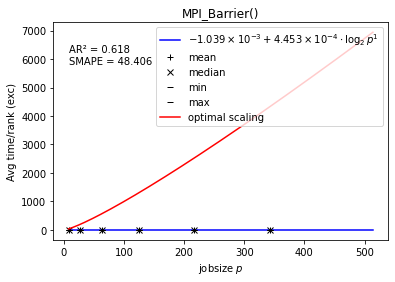

In [10]:
model_obj = thicket.statsframe.dataframe["config2"].at[thicket.statsframe.dataframe.index[0], "Avg time/rank (exc)_extrap-model"]

plt.clf()
fig, ax = model_obj.display(show_mean=True, show_median=True, 
                            show_min_max=True, 
                            AR2=True, SMAPE=True, show_opt_scaling=True,
                            opt_scaling_func="1.5*p**1*log2(p)**1")
 
# Plot graph
plt.show()


In [11]:
with pd.option_context("display.max_colwidth", 1):
    display(HTML(extrap_interface.to_html(show_mean=True, show_median=True, 
                            show_min_max=True, RSS=True, 
                            AR2=True, show_opt_scaling=False)))


NameError: name 'mdl' is not defined

In [ ]:
mdl.componentize_statsframe()

xp_comp_df = t_ens.statsframe.dataframe

xp_comp_df

In [ ]:
#mdl.complexity_statsframe(eval_targets=[[512,70],[1024,80]])
mdl.complexity_statsframe(eval_targets=[[512],[1024]])

xp_comp_df = t_ens.statsframe.dataframe

xp_comp_df

In [ ]:
# sort by growth rank to identify bottlenecks
#x = xp_comp_df.sort_values(by=["Avg time/rank (exc)_extrap-model_complexity_(512,70)"])
x = xp_comp_df.sort_values(by=["Avg time/rank (exc)_extrap-model_complexity_(512)"])
x

In [ ]:
#x = xp_comp_df.groupby("Avg time/rank (exc)_extrap-model_complexity_(512,70)")
x = xp_comp_df.groupby("Avg time/rank (exc)_extrap-model_complexity_(512)")
for key, value in x.groups.items():
    print(key)
    print(value)
